In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()
tf.executing_eagerly()


True

In [2]:
tfe = tf.contrib.eager
L = tf.keras.layers

In [4]:
def toy_data():
    x = np.linspace(-2, 2, 100).reshape(-1, 1)
    a1 = -3
    a2 = -2
    a3 = 2
    b = 1
    y = a1*x + a2*x**2 + a3*x**3 + 3*np.random.randn(100, 1)
    return x, y

x, y = toy_data()

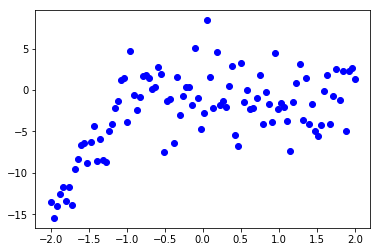

In [5]:
plt.plot(x, y, "bo")

In [6]:
x_train = tf.convert_to_tensor(x, dtype=tf.float32)
y_train = tf.convert_to_tensor(y, dtype=tf.float32)

In [7]:
learning_rate = 1e-4
hidden_size = 10

model_relu = tf.keras.Sequential([
    L.Dense(hidden_size, activation="relu"),
    L.Dense(hidden_size, activation="relu"),
    L.Dense(1),
])

model_tanh = tf.keras.Sequential([
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(1),
])

def loss_fn(model, x, y):
    y_ = model(x)
    return tf.keras.losses.mean_squared_error(y, y_)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)


In [11]:
for i in range(1000):
    with tf.GradientTape(persistent=True) as tape:
        loss_relu = loss_fn(model_relu, x_train, y_train)
        loss_tanh = loss_fn(model_tanh, x_train, y_train)
        
    grads_relu = tape.gradient(loss_relu, model_relu.variables)
    grads_tanh = tape.gradient(loss_tanh, model_tanh.variables)
    #
    optimizer.apply_gradients(zip(grads_relu, model_relu.variables))
    optimizer.apply_gradients(zip(grads_tanh, model_tanh.variables))
    
    if (i+1) % 100 == 0:
        print("epoch: ", i+1)
        print("loss_relu: {}".format(loss_relu.numpy().mean()))
        print("loss_tanh: {}".format(loss_tanh.numpy().mean()))
        

epoch:  100
loss_relu: 7.537586212158203
loss_tanh: 7.226580619812012
epoch:  200
loss_relu: 7.547873020172119
loss_tanh: 7.226006984710693
epoch:  300
loss_relu: 7.476791858673096
loss_tanh: 7.225441932678223
epoch:  400
loss_relu: 7.5058817863464355
loss_tanh: 7.224884033203125
epoch:  500
loss_relu: 7.527679920196533
loss_tanh: 7.224332332611084
epoch:  600
loss_relu: 7.535670757293701
loss_tanh: 7.223789215087891
epoch:  700
loss_relu: 7.499844551086426
loss_tanh: 7.223252773284912
epoch:  800
loss_relu: 7.504417896270752
loss_tanh: 7.222722053527832
epoch:  900
loss_relu: 7.399320602416992
loss_tanh: 7.22219705581665
epoch:  1000
loss_relu: 7.405355453491211
loss_tanh: 7.221677780151367


In [12]:
y_predict_relu = model_relu(x_train).numpy()
y_predict_tanh = model_tanh(x_train).numpy()

In [ ]:
plt.plot(x, y, "bo", alpha=0.3)
p